<a href="https://colab.research.google.com/github/AnusreeMandal/SoftComputing_Lab/blob/main/mobileprice_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

df_train=pd.read_csv('train.csv')

df_test=pd.read_csv('test.csv')

In [5]:
df_train.head()
df_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [7]:
# Features selected based on domain knowledge
selected_features = [
    'battery_power', 'ram', 'px_height', 'px_width',
    'mobile_wt', 'int_memory', 'clock_speed'
]

# Use df_train and df_test instead of train_data and test_data
X_train = df_train[selected_features]  # Use the DataFrame created earlier
y_train = df_train['price_range']
X_test = df_test[selected_features]    # Use the DataFrame created earlier

In [8]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64
id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64


In [9]:
X = df_train.drop(columns=['price_range'])
Y = df_train['price_range']

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
train_losses = []
val_losses = []

# Define the range for the number of trees
n_estimators_range = range(1, 101)  # From 1 to 200 trees

# Iterate over the number of trees
for n_estimators in n_estimators_range:
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, Y_train)

    # Predict probabilities for log loss
    Y_train_prob = model.predict_proba(X_train)
    Y_val_prob = model.predict_proba(X_val)

    # Calculate log loss
    train_loss = log_loss(Y_train, Y_train_prob)
    val_loss = log_loss(Y_val, Y_val_prob)

    train_losses.append(train_loss)
    val_losses.append(val_loss)


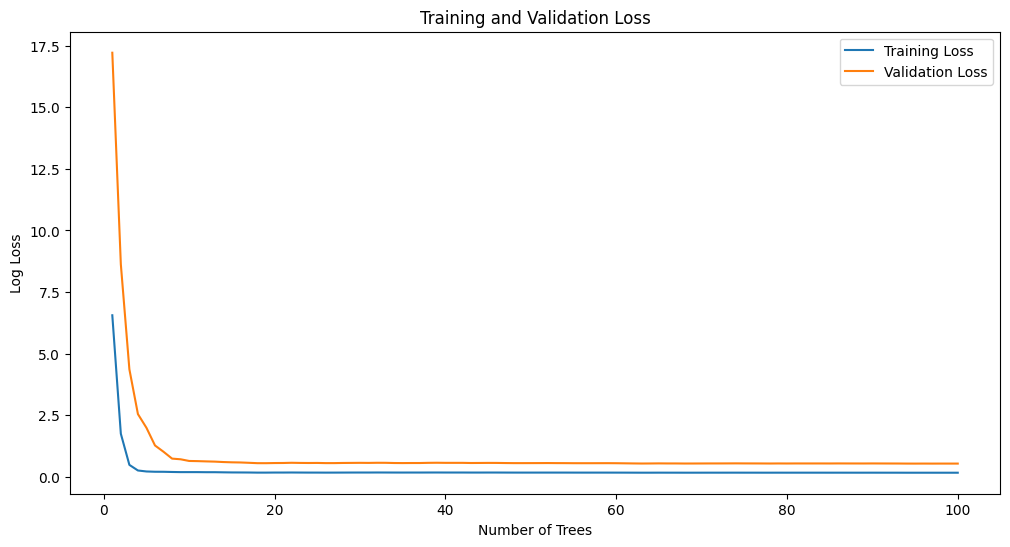

In [13]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(n_estimators_range, train_losses, label='Training Loss')
plt.plot(n_estimators_range, val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Number of Trees')
plt.ylabel('Log Loss')
plt.legend()
plt.show()


In [14]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [16]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(Y_train, Y_train_pred)
val_accuracy = accuracy_score(Y_val, Y_val_pred)

In [17]:
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

Training Accuracy: 1.0
Validation Accuracy: 0.8925


In [18]:
from sklearn.metrics import classification_report
print("Training Classification Report \n :" , classification_report(Y_train, Y_train_pred))
print("Validation Classification Report \n :" , classification_report(Y_val, Y_val_pred))

Training Classification Report 
 :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       395
           1       1.00      1.00      1.00       409
           2       1.00      1.00      1.00       408
           3       1.00      1.00      1.00       388

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600

Validation Classification Report 
 :               precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.89      0.87      0.88        91
           2       0.78      0.87      0.82        92
           3       0.94      0.87      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



In [19]:
epochs = range(1, len(Y_train_pred) + 1)

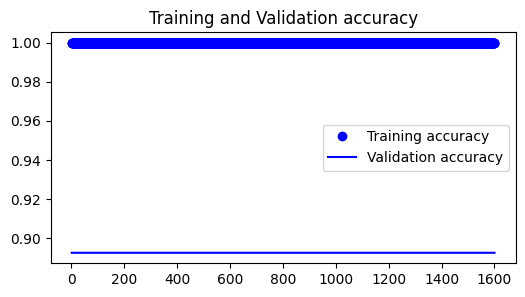

In [21]:
from matplotlib import pyplot as plt
plt.figure(figsize=(6, 3))
plt.plot(epochs, [train_accuracy]*len(epochs), 'bo', label='Training accuracy')
plt.plot(epochs, [val_accuracy]*len(epochs), 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.show()

In [22]:
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(model, X_scaled, Y, cv=5, scoring='accuracy')

In [23]:
print("Cross-Validation Scores: ", cross_val_scores)
print("Mean Cross-Validation Accuracy: ", cross_val_scores.mean())


Cross-Validation Scores:  [0.8725 0.8775 0.8925 0.8775 0.87  ]
Mean Cross-Validation Accuracy:  0.8779999999999999


In [24]:
test_data = pd.read_csv('test.csv')
test_data_scaled = scaler.transform(test_data.drop(columns=['id']))
test_predictions = model.predict(test_data_scaled)

# Add predictions to the test data
test_data['price_range'] = test_predictions

# Save the predictions to a CSV file
test_data[['id', 'price_range']].to_csv('test_predictions.csv', index=False)
print("Predictions saved to test_predictions.csv")

Predictions saved to test_predictions.csv


In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_val, Y_val_pred)
print("Confusion Matrix: \n", cm)

Confusion Matrix: 
 [[101   4   0   0]
 [  5  79   7   0]
 [  0   6  80   6]
 [  0   0  15  97]]


Text(33.22222222222222, 0.5, 'Truth')

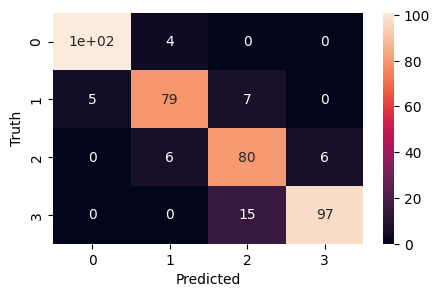

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [28]:
final_model = RandomForestClassifier(n_estimators=100, max_depth=12, random_state=42)
final_model.fit(X_train, Y_train)

train_accuracy = accuracy_score(Y_train, final_model.predict(X_train))
val_accuracy = accuracy_score(Y_val, final_model.predict(X_val))

print("Training Accuracy: ", train_accuracy)
print("Validation Accuracy: ", val_accuracy)

if train_accuracy - val_accuracy > 0.1:  # 0.1 is an arbitrary threshold, you can adjust it
    print("The model is overfitting.")
else:
    print("The model is not overfitting.")

Training Accuracy:  1.0
Validation Accuracy:  0.8925
The model is overfitting.
